In [5]:
import sid
import standardmodel as sm
import darksector as ds
import constants as c
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time
from scipy import integrate, special
plt.rcParams.update({'font.size': 16})

# Dodelson Widrow Comparison

In [19]:
# Parameters
theta = 10**-5
ms = 1e-4
flavor = 'tau'
antineutrino=False
Ti = 5*sid.Tmax(ms)
Tfinal_integral = max(1, 0.01*(sid.Tmax(ms)))
Tfinal = 1
T_domain = np.logspace(np.log10(Ti), np.log10(Tfinal_integral), 500)

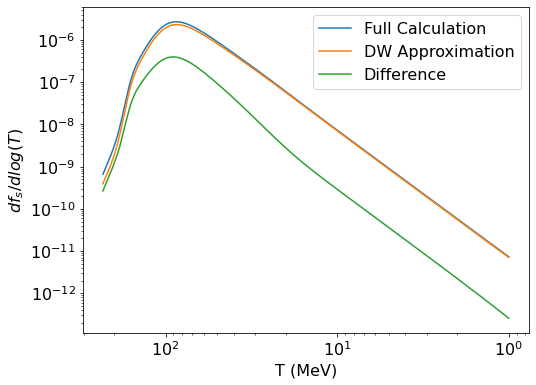

In [20]:
# Differences in the production rate

y = 1 #p/Tfinal

integrand = -1*sid.boltzmann_integrand_T(np.log(T_domain), y, Tfinal, theta, ms, flavor, antineutrino, simplify=False)
integrand_DW = -1*sid.boltzmann_integrand_T(np.log(T_domain), y, Tfinal, theta, ms, flavor, antineutrino, simplify='DW')
plt.figure(figsize=(8,6))
plt.loglog(T_SM_domain, integrand, label='Full Calculation')
plt.loglog(T_domain, integrand_DW, label='DW Approximation')
plt.loglog(T_domain, np.abs(integrand_DW-integrand), label='Difference')
plt.xlabel(r'T (MeV)')
plt.ylabel(r"$df_s/dlog(T)$")
# flip the x axis
plt.gca().invert_xaxis()
plt.legend()
plt.show()

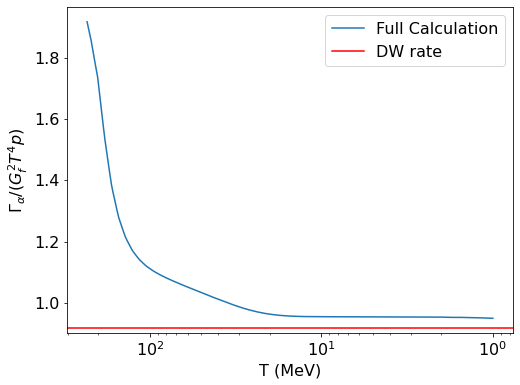

In [21]:
# Differences in the active neutrino scattering rate
poverT = 1

plt.figure(figsize=(8,6))
rate = sid.active_scattering_rate(poverT*T_domain, T_domain, flavor, simplify=False)/(c.Gf**2*T_domain**5*poverT)
plt.plot(T_domain, rate, label='Full Calculation')
plt.axhline(7*np.pi/24, label='DW rate', c='r')
plt.ylabel(r"$\Gamma_\alpha /(G_f^2 T^4 p)$")
plt.xlabel(r'T (MeV)')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.legend()
plt.show()

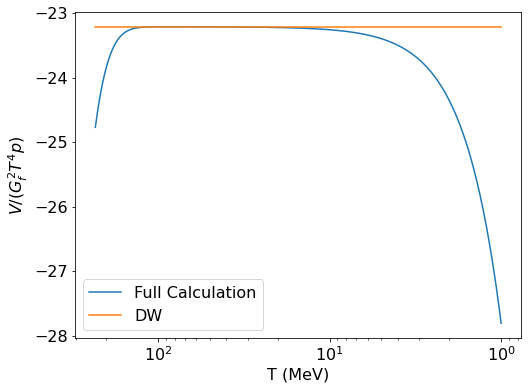

In [22]:
# Differences in the matter potential
poverT = 1

plt.figure(figsize=(8,6))
Vmatter = sid.matter_potential(poverT*T_domain, T_domain, flavor, antineutrino)
Vmatter_DW = sid.matter_potential(poverT*T_domain, T_domain, flavor, antineutrino, simplify='DW')
plt.plot(T_domain, Vmatter/(c.Gf**2*T_domain**5*poverT), label=r'Full Calculation')
plt.plot(T_domain, Vmatter_DW/(c.Gf**2*T_domain**5*poverT), label=r'DW')
plt.ylabel(r'$V/(G_f^2 T^4 p)$')
plt.xlabel(r'T (MeV)')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.legend()
plt.show()

 Solve the boltzmann equation to get the final distribution function

In [23]:
poverT_domain = np.linspace(0.25, 5, 50)
fs_boltzmann_DW, fs_boltzmann = [], []
for y in poverT_domain:
    fs_boltzmann_DW.append(sid.boltzmann_solve(y, Ti, Tfinal_integral, Tfinal, theta, ms, flavor, antineutrino, simplify='DW'))
    fs_boltzmann.append(sid.boltzmann_solve(y, Ti, Tfinal_integral, Tfinal, theta, ms, flavor, antineutrino, simplify=False))

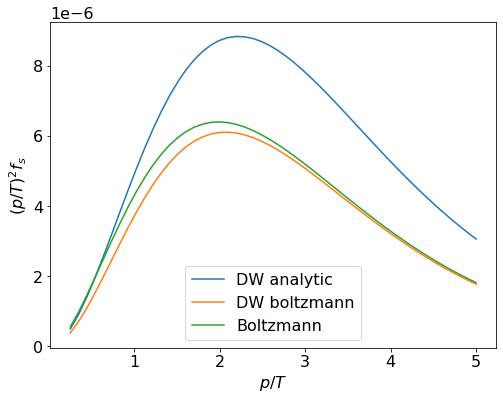

In [26]:
# Analytic solution, equation 9 in DW
gstar = sm.compute_SM_relativistic_dof_approx(Tfinal)

plt.figure(figsize=(8,6))
plt.plot(poverT_domain, poverT_domain**2*sid.fs_DW(poverT_domain, gstar, theta, ms), label='DW analytic')
# factor of 2 to include the antineutrino production channel
plt.plot(poverT_domain, 2*poverT_domain**2*fs_boltzmann_DW, label='DW boltzmann')
plt.plot(poverT_domain, 2*poverT_domain**2*fs_boltzmann, label='Boltzmann')
plt.xlabel(r'$p/T$')
plt.ylabel(r'$(p/T)^2 f_s$')
plt.legend()
plt.show()

## Final Energy Density

In [27]:
ms = 10**-6
theta = 10**-4
flavor = 'muon'
antineutrino=False
simplify='DW'
omegahsq_sid = sid.compute_omegahsq_sid(ms, theta, flavor, antineutrino, simplify, ymin = 0.01, ymax=20)

omegahsq_DW = ms**2*(6/np.sqrt(10.8))*10**15*theta**2/92
print("omegahsq_sid = ", omegahsq_sid)
print("omegahsq_DW = ", omegahsq_DW)

omegahsq_sid =  1.8632982832928624e-07
omegahsq_DW =  1.984502019946254e-07


# Comparison to AFP

Final abundance

In [ ]:
ms = 10**-2
theta = 0.5*10**-10
flavor = 'tau'
antineutrino=False
simplify=False
omegahsq_sid = sid.compute_omegahsq_sid(ms, theta, flavor, antineutrino, simplify, ymin = 0.25, ymax=5)

omegahsq_AFP = 0.3*np.sin(2*theta)**2*10**10*(10*ms)**2
print("omegahsq_sid = ", omegahsq_sid)
print("omegahsq_AFP = ", omegahsq_AFP)

omegahsq_sid =  9.911807843071752e-13
omegahsq_AFP =  3.0000000000000003e-13


 Fig 2

In [ ]:
flavor = 'electron'
antineutrino=False
simplify=False

ms_domain = np.logspace(-5, 1, 10)
sinsq2theta_domain = np.logspace(-20, -5, 16)
# Make a 2d array of the omegahsq values for each ms and theta, for the SID calculation only
omegahsq_sid = np.zeros((len(ms_domain), len(sinsq2theta_domain)))
for i, ms in enumerate(ms_domain):
    for j, sinsq2theta in enumerate(sinsq2theta_domain):
        omegahsq_sid[i,j] = sid.compute_omegahsq_sid(ms, np.sqrt(sinsq2theta/2), flavor, antineutrino, simplify, ymin = 0.25, ymax=5, num_T=50, num_y=10)


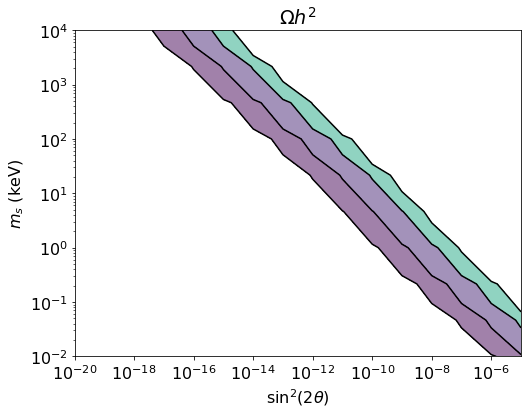

In [ ]:
# Make a contour plot of the results. The contour levels are 0.001, 0.01, and 0.1. The x and y axes are in log space. The x-axis is the sinsq2theta, and the y-axis is the ms.
import matplotlib

plt.figure(figsize=(8,6))

# Create filled contour plot with half-transparency
contourf = plt.contourf(sinsq2theta_domain, 10**3*ms_domain, omegahsq_sid, levels=[0.001, 0.01, 0.1, 0.5], alpha=0.5)

# Create contour lines
contour = plt.contour(sinsq2theta_domain, 10**3*ms_domain, omegahsq_sid, levels=[0.001, 0.01, 0.1, 0.5], colors='black')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\sin^2(2\theta)$')
plt.ylabel(r'$m_s$ (keV)')
plt.title(r'$\Omega h^2$')
plt.show()

# Comparison to Alonso-Alvarez (matter potential above EW scale)

### Fig. 2

In [2]:
ms_domain = np.logspace(1, 4, 10)
theta = 10**-8
antineutrino = False
simplify='below EW'
flavor='electron'

omegahsq_full = np.array([sid.compute_omegahsq_sid(ms, theta, flavor, antineutrino) for ms in ms_domain])
omegahsq_below_EW  = np.array([sid.compute_omegahsq_sid(ms, theta, flavor, antineutrino, simplify='below EW') for ms in ms_domain])

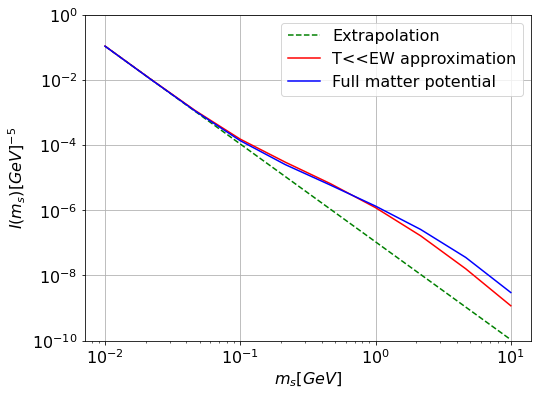

In [4]:
ns = (omegahsq_below_EW*c.rho_crit_over_hsq/ms_domain)
ns_over_na = 3*ns/c.CnuB_ndens #Equation 10 in AAC seems to not include the number of active flavors
integral_below_EW = ns_over_na*3*special.zeta(3)*1.66/(2*ms_domain**4*theta**2*c.mplanck)

ns = (omegahsq_full*c.rho_crit_over_hsq/ms_domain)
ns_over_na = 3*ns/c.CnuB_ndens #Equation 10 in AAC seems to not include the number of active flavors
integral_full = ns_over_na*3*special.zeta(3)*1.66/(2*ms_domain**4*theta**2*c.mplanck)

#extrapolation:
integral_extrap = integral_full[0]*(ms_domain[0]/ms_domain)**3

plt.figure(figsize=(8, 6))
plt.loglog(10**-3*ms_domain, 10**15*integral_extrap, ls='--', c='g', label='Extrapolation')
plt.loglog(10**-3*ms_domain, 10**15*integral_below_EW,  c='r', label='T<<EW approximation')
plt.loglog(10**-3*ms_domain, 10**15*integral_full, c='b', label='Full matter potential')
plt.ylabel(r"$I(m_s) [GeV]^{-5}$")
plt.xlabel(r"$m_s [GeV]$")
plt.legend()
plt.grid()
plt.ylim(10**-10, 1)
plt.show()

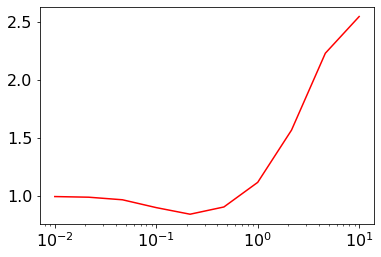

In [5]:
plt.semilogx(10**-3*ms_domain, integral_full/integral_below_EW,  c='r', label='T<<EW approximation')


### Check the integrand

In [5]:
# Parameters
theta = 10**-8
ms = 10**3
flavor = 'muon'
antineutrino=False
simplify=False
Ti = min(10*sid.Tmax(ms), 149*10**3)
Tfinal_integral = max(1, 0.02*sid.Tmax(ms))
Tfinal = 1
T_domain = np.logspace(np.log10(Ti), np.log10(Tfinal_integral), 2000)

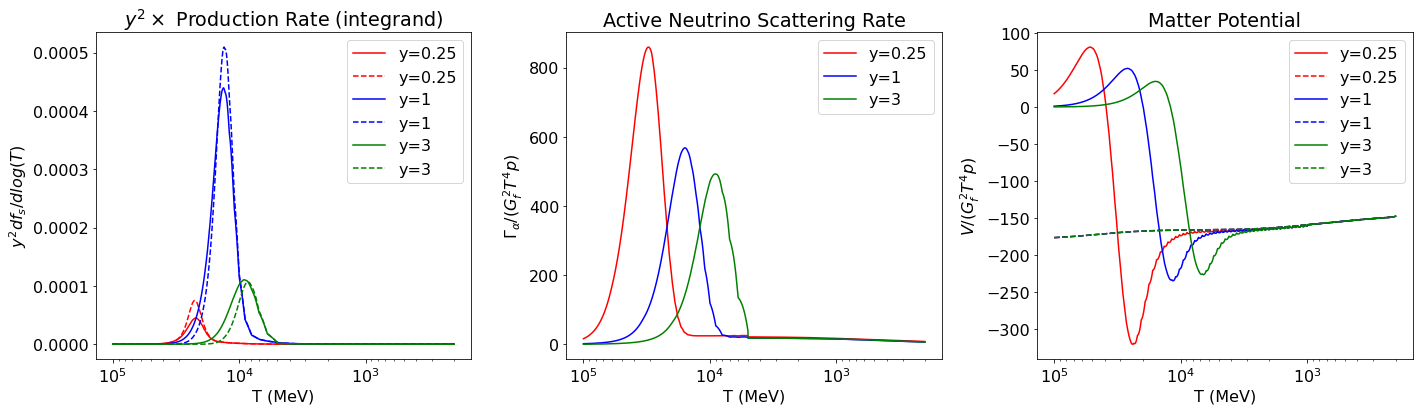

In [12]:
ydomain = [0.25, 1, 3] #p/Tfinal
colors = ['r', 'b', 'g']

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Production rate
axs[0].set_title(r"$y^2 \times$ Production Rate (integrand)")
for y, color in zip(ydomain, colors):
    # Full matter potential
    integrand = -1*sid.boltzmann_integrand_T(np.log(T_domain), y, Tfinal, theta, ms, flavor, antineutrino, simplify)
    axs[0].semilogx(T_domain, y**2*integrand, label=f'y={y}', color=color)
    # Approximation T << T_EW matter potential
    integrand = -1*sid.boltzmann_integrand_T(np.log(T_domain), y, Tfinal, theta, ms, flavor, antineutrino, simplify='below EW')
    axs[0].semilogx(T_domain, y**2*integrand, ls='--', label=f'y={y}', color=color)
axs[0].set_xlabel(r'T (MeV)')
axs[0].set_ylabel(r"$y^2 df_s/dlog(T)$")
# flip the x axis
axs[0].invert_xaxis()
axs[0].legend()

# Active neutrino scattering rate
axs[1].set_title("Active Neutrino Scattering Rate")
for y, color in zip(ydomain, colors):
    p = y*Tfinal*(sid.SM_entropy_density(T_domain)/sid.SM_entropy_density(Tfinal))**(1./3) # The corresponding momentum at each temperature
    rate = sid.active_scattering_rate(p, T_domain, flavor, simplify)/(c.Gf**2*T_domain**5*y)
    axs[1].plot(T_domain, rate, label=f'y={y}', color=color)
axs[1].set_ylabel(r"$\Gamma_\alpha /(G_f^2 T^4 p)$")
axs[1].set_xlabel(r'T (MeV)')
axs[1].invert_xaxis()
axs[1].set_xscale('log')
axs[1].legend()

# Matter potential
axs[2].set_title("Matter Potential")
for y, color in zip(ydomain, colors):
    # Full matter potential
    p = y*Tfinal*(sid.SM_entropy_density(T_domain)/sid.SM_entropy_density(Tfinal))**(1./3) # The corresponding momentum at each temperature
    Vmatter = sid.matter_potential(p, T_domain, flavor, antineutrino, simplify)
    axs[2].plot(T_domain, Vmatter/(c.Gf**2*T_domain**5*y), label=f'y={y}', color=color)
    # Approximation T << T_EW matter potential
    Vmatter = sid.matter_potential(p, T_domain, flavor, antineutrino, simplify='below EW')
    axs[2].plot(T_domain, Vmatter/(c.Gf**2*T_domain**5*y), ls='--', label=f'y={y}', color=color)
axs[2].set_ylabel(r'$V/(G_f^2 T^4 p)$')
axs[2].set_xlabel(r'T (MeV)')
axs[2].invert_xaxis()
axs[2].set_xscale('log')
axs[2].legend()

# Show all plots
plt.tight_layout()
plt.show()

### Fig. 2

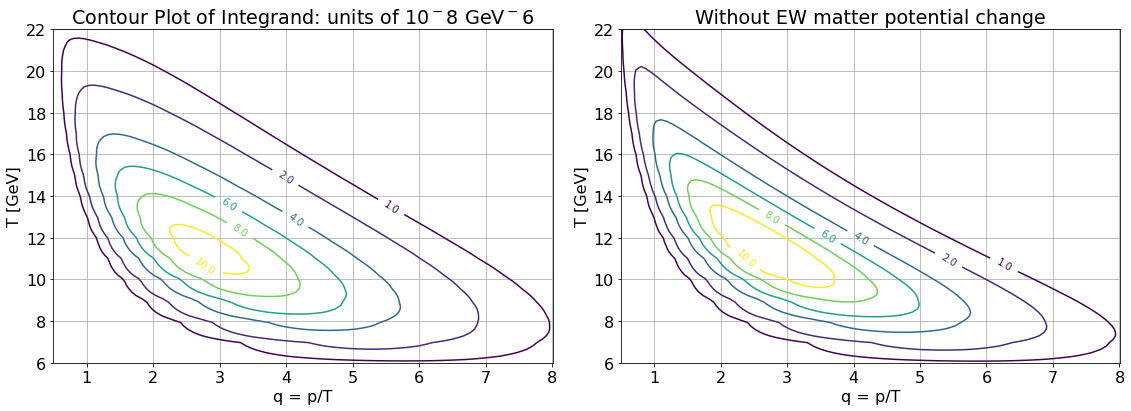

In [49]:
Tprime_domain = np.linspace(6, 22, 100)*10**3
y_domain = np.linspace(0.25, 4, 100)
# Factor of 2 from conversion from my 'y' to their q=p/T. Because I define y as p/T at T=1 MeV
p_over_T_domain = y_domain*(sm.compute_SM_relativistic_dof_approx(10*10**3)/sm.compute_SM_relativistic_dof_approx(1))**(1./3)
Tf = 1
theta = 10**-8
ms = 10**3
flavor = 'electron'

def conversion(omegahsq):
    ns = (omegahsq*c.rho_crit_over_hsq/ms)
    ns_over_na = 3*ns/c.CnuB_ndens #Equation 10 in AAC seems to not include the number of active flavors
    return ns_over_na*3*special.zeta(3)*1.66/(2*ms**4*theta**2*c.mplanck)

# Calculate the integrand values for the first plot
integrand_values = np.empty((len(Tprime_domain), len(y_domain)))
for i, Tprime in enumerate(Tprime_domain):
    for j, y in enumerate(y_domain):
        omegahsq_integrand = ds.rho_to_omegahsq(ms*2*(c.Tcnub**3/np.pi**2)*sid.boltzmann_integrand_T(np.log(Tprime), y, Tf, theta, ms, flavor)*y**2/Tprime)
        integrand_values[i, j] = conversion(omegahsq_integrand)

# Create the first contour plot
contour_levels = np.array([1, 2, 4, 6, 8, 10])
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

contour = axs[0].contour(p_over_T_domain, Tprime_domain*10**-3, -1*10**(3*6)*integrand_values*10**8, levels=contour_levels)
axs[0].clabel(contour, inline=True, fontsize=10, fmt='%1.1f')
axs[0].set_xlabel('q = p/T')
axs[0].set_ylabel('T [GeV]')
axs[0].set_title(r'Contour Plot of Integrand: units of $10^-8$ GeV$^-6$')
axs[0].set_xticks(np.arange(1, 9, 1))
axs[0].set_yticks(np.arange(min(Tprime_domain*10**-3), max(Tprime_domain*10**-3)+1, 2))
axs[0].grid()

# Calculate the integrand values for the second plot
integrand_values = np.empty((len(Tprime_domain), len(y_domain)))
for i, Tprime in enumerate(Tprime_domain):
    for j, y in enumerate(y_domain):
        omegahsq_integrand = ds.rho_to_omegahsq(ms*2*(c.Tcnub**3/np.pi**2)*sid.boltzmann_integrand_T(np.log(Tprime), y, Tf, theta, ms, flavor, simplify='below EW')*y**2/Tprime)
        integrand_values[i, j] = conversion(omegahsq_integrand)

# Create the second contour plot
contour = axs[1].contour(p_over_T_domain, Tprime_domain*10**-3, -1*10**(3*6)*integrand_values*10**8, levels=contour_levels)
axs[1].clabel(contour, inline=True, fontsize=10, fmt='%1.1f')
axs[1].set_xlabel('q = p/T')
axs[1].set_ylabel('T [GeV]')
axs[1].set_title('Without EW matter potential change')
axs[1].set_xticks(np.arange(1, 9, 1))
axs[1].set_yticks(np.arange(min(Tprime_domain*10**-3), max(Tprime_domain*10**-3)+1, 2))
axs[1].grid()

plt.tight_layout()
plt.show()


### Check the impact of the resonance on the SID rate

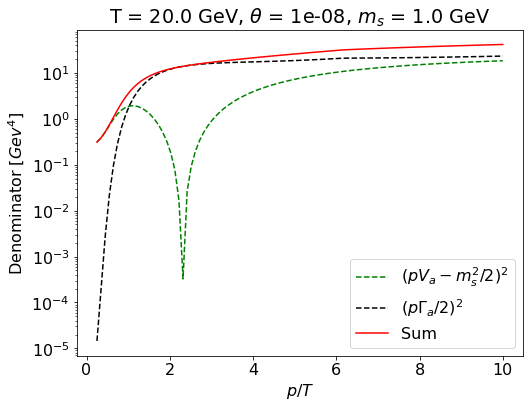

In [14]:
p_over_T_domain = np.linspace(0.25, 10, 100)
T =20*10**3
theta = 10**-8
ms = 10**3
flavor = 'electron'

denom_left_full, denom_left_no_EW, denom_right= [], [], []
for p in p_over_T_domain*T:
    denom_right.append((p*sid.active_scattering_rate(p, T, flavor, simplify=False)/2)**2)
    # Full matter potential
    V = sid.matter_potential(p, T, flavor, antineutrino=False, simplify=False)[0]
    denom_left_full.append((p*V-ms**2/2)**2)
    # No EW matter potential
    V = sid.matter_potential(p, T, flavor, antineutrino=False, simplify='below EW')
    denom_left_no_EW.append((p*V-ms**2/2)**2)

denom_left_full = 10**-12*np.array(denom_left_full)
denom_left_no_EW = 10**-12*np.array(denom_left_no_EW)
denom_right = 10**-12*np.array(denom_right)

plt.figure(figsize=(8, 6))
plt.semilogy(p_over_T_domain, denom_left_full, c='g', ls='--', label=r'$(pV_a - m_s^2/2)^2$')
#plt.semilogy(p_over_T_domain, denom_left_no_EW, c='b', ls='--', label=r'$pV_a - m_s^2/2$: No EW $V_a$')
plt.semilogy(p_over_T_domain, denom_right, c='k', ls='--', label=r'$(p \Gamma_a/2)^2$')
#plt.semilogy(p_over_T_domain, denom_left_no_EW + denom_right, c='b', label=r'Denominator: No EW $V_a$')
plt.semilogy(p_over_T_domain, denom_left_full + denom_right, c='r', label=r'Sum')
plt.xlabel(r'$p/T$')
plt.ylabel(r"Denominator [$Gev^4$]") 
plt.title(f"T = {T*10**-3} GeV, $\\theta$ = {theta}, $m_s$ = {ms*10**-3} GeV")
plt.legend()
plt.show()

# Solving the boltzmann equation

## Inputs

In [3]:
# Parameters
theta = 10**-5
ms = 10**0
flavor = 'electron'
antineutrino=False
simplify=False
Ti = min(10*sid.Tmax(ms), 149*10**3)
Tfinal_integral = max(1, 0.02*sid.Tmax(ms))
Tfinal = 1
T_domain = np.logspace(np.log10(Ti), np.log10(Tfinal_integral), 2000)

## Look at the Inputs

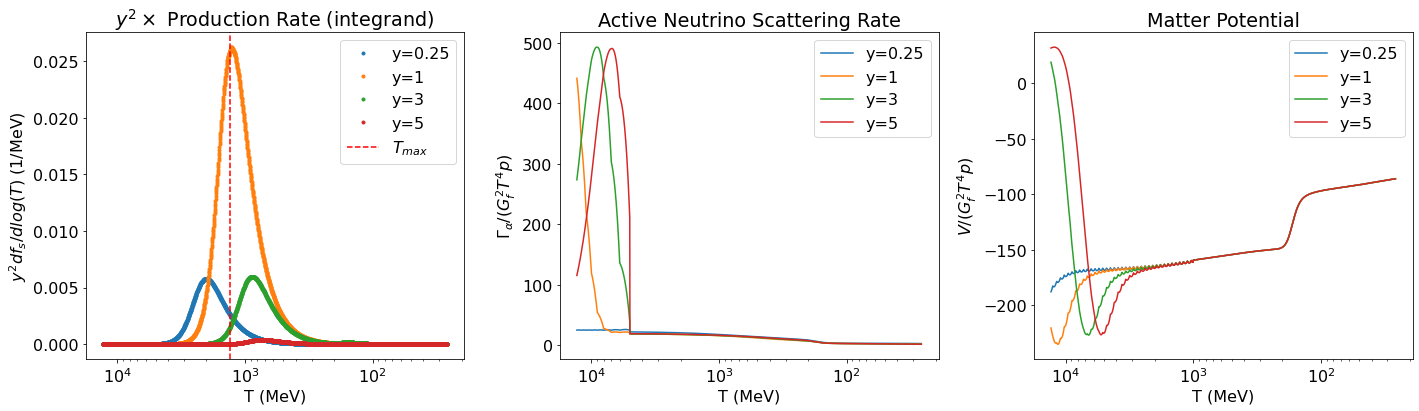

In [4]:
ydomain = [0.25, 1, 3, 5] #p/Tfinal

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Production rate
axs[0].set_title(r"$y^2 \times$ Production Rate (integrand)")
for y in ydomain:
    integrand = -1*sid.boltzmann_integrand_T(np.log(T_domain), y, Tfinal, theta, ms, flavor, antineutrino, simplify)
    axs[0].semilogx(T_domain, y**2*integrand, '.', label=f'y={y}')
axs[0].axvline(sid.Tmax(ms), ls='--', label=r'$T_{max}$', c='r')
axs[0].set_xlabel(r'T (MeV)')
axs[0].set_ylabel(r"$y^2 df_s/dlog(T)$ (1/MeV)")
# flip the x axis
axs[0].invert_xaxis()
axs[0].legend()

# Active neutrino scattering rate
axs[1].set_title("Active Neutrino Scattering Rate")
for y in ydomain:
    p = y*Tfinal*(sid.SM_entropy_density(T_domain)/sid.SM_entropy_density(Tfinal))**(1./3) # The corresponding momentum at each temperature
    rate = sid.active_scattering_rate(p, T_domain, flavor, simplify)/(c.Gf**2*T_domain**5*y)
    axs[1].plot(T_domain, rate, label=f'y={y}')
axs[1].set_ylabel(r"$\Gamma_\alpha /(G_f^2 T^4 p)$")
axs[1].set_xlabel(r'T (MeV)')
axs[1].invert_xaxis()
axs[1].set_xscale('log')
axs[1].legend()

# Matter potential
axs[2].set_title("Matter Potential")
for y in ydomain:
    p = y*Tfinal*(sid.SM_entropy_density(T_domain)/sid.SM_entropy_density(Tfinal))**(1./3) # The corresponding momentum at each temperature
    Vmatter = sid.matter_potential(p, T_domain, flavor, antineutrino, simplify)
    axs[2].plot(T_domain, Vmatter/(c.Gf**2*T_domain**5*y), label=f'y={y}')
axs[2].set_ylabel(r'$V/(G_f^2 T^4 p)$')
axs[2].set_xlabel(r'T (MeV)')
axs[2].invert_xaxis()
axs[2].set_xscale('log')
axs[2].legend()

# Show all plots
plt.tight_layout()
plt.show()


## Solve

In [4]:
poverT_domain = np.linspace(0.25, 5, 50)
fs_boltzmann = []
for y in poverT_domain:
    fs_boltzmann.append(sid.boltzmann_solve(y, Ti, Tfinal_integral, Tfinal, theta, ms, flavor, antineutrino, simplify, num_points=500))

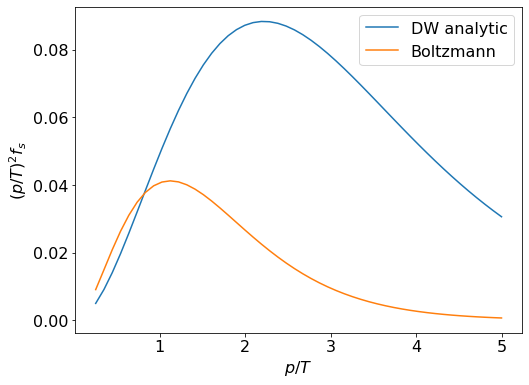

In [9]:
gstar = sm.compute_SM_relativistic_dof_approx(Tfinal)

plt.figure(figsize=(8,6))
plt.plot(poverT_domain, poverT_domain**2*sid.fs_DW(poverT_domain, gstar, theta, ms), label='DW analytic') 
plt.plot(poverT_domain, 2*poverT_domain**2*fs_boltzmann, label='Boltzmann') # Include the antineutrino production channel
#plt.plot(poverT_domain, poverT_domain**2*1e-5/(np.exp(poverT_domain)+1), label='thermal scaled')
plt.xlabel(r'$p/T$')
plt.ylabel(r'$(p/T)^2 f_s$')
plt.legend()
plt.show()

## Check the difference between the neutrino and antineutrino channels

Only difference is in matter potential in irrelevant range

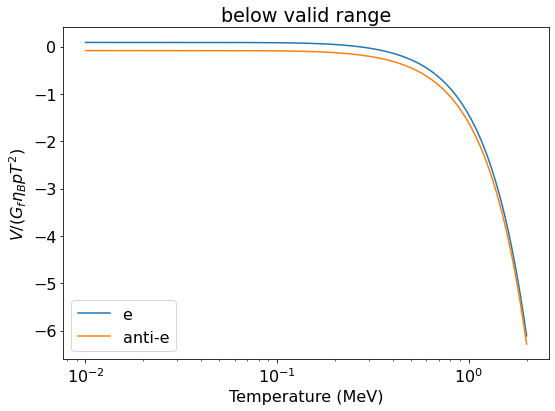

In [ ]:
poverT = 1
T_domain = np.linspace(0.01, 2, 1000)
plt.figure(figsize=(8,6))
plt.title(r"below valid range")
plt.semilogx(T_domain, sid.matter_potential(poverT*T_domain, T_domain, 'electron', antineutrino=False)/(c.Gf*c.eta_B*poverT*T_domain**3), label='e')
plt.semilogx(T_domain, sid.matter_potential(poverT*T_domain, T_domain, 'electron', antineutrino=True)/(c.Gf*c.eta_B*poverT*T_domain**3), label='anti-e')
plt.xlabel("Temperature (MeV)")
plt.ylabel(r"$V/(G_f \eta_B p T^2)$")
plt.tight_layout()
plt.legend()
plt.show()

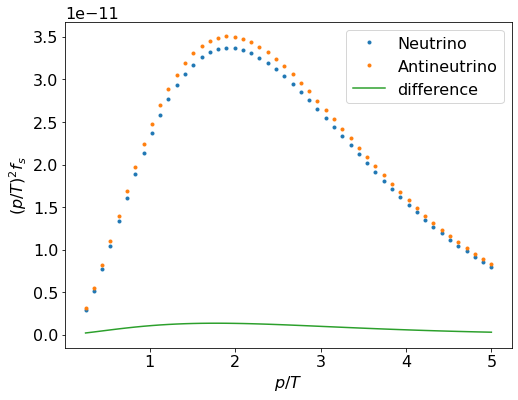

In [ ]:
# Would need to go down to T<1 Mev (which is below the valid range for the calc AND for sterile neutrino masses), ie like ms = 1 meV, to see a difference
theta = 10**-5
ms = 10**-9
flavor = 'muon'
simplify=False
Ti = min(10*sid.Tmax(ms), 149*10**3)
Tfinal_integral = max(1, 0.02*sid.Tmax(ms))
Tfinal = 1

poverT_domain = np.linspace(0.25, 5, 50)
fs_neutrino, fs_antineutrino = [], []
for y in poverT_domain:
    fs_neutrino.append(sid.boltzmann_solve(y, Ti, Tfinal_integral, Tfinal, theta, ms, flavor, antineutrino=False, simplify=simplify, num_points=500))
    fs_antineutrino.append(sid.boltzmann_solve(y, Ti, Tfinal_integral, Tfinal, theta, ms, flavor, antineutrino=True, simplify=simplify, num_points=500))

plt.figure(figsize=(8,6))
plt.plot(poverT_domain, poverT_domain**2*fs_neutrino, '.', label='Neutrino')
plt.plot(poverT_domain, poverT_domain**2*fs_antineutrino, '.', label='Antineutrino')
plt.plot(poverT_domain, poverT_domain**2*(np.array(fs_antineutrino)-np.array(fs_neutrino)), label='difference')
plt.xlabel(r'$p/T$')
plt.ylabel(r'$(p/T)^2 f_s$')
plt.legend()
plt.show()

## Comparison of numerical methods

In [6]:
# Parameters
theta = 10**-6
ms = 10**2
flavor = 'tau'
antineutrino=False
simplify=False
Ti = min(10*sid.Tmax(ms), 150*10**3)
Tf_integral = max(1, 0.01*sid.Tmax(ms))
Tf = 10**0
T_domain = np.logspace(np.log10(Ti), np.log10(Tf_integral), 500)
y=1

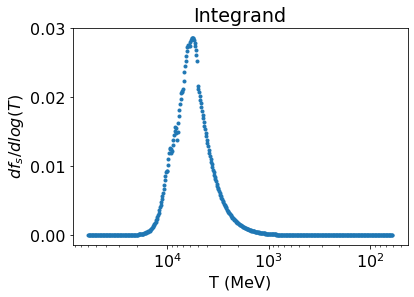

In [7]:
rate = sid.boltzmann_integrand_T(np.log(T_domain), y, Tf, theta, ms, flavor, antineutrino, simplify)
plt.semilogx(T_domain, -1*rate, '.')
plt.ylabel(r"$df_s/dlog(T)$")
plt.xlabel(r'T (MeV)')
plt.gca().invert_xaxis()
plt.title("Integrand")
plt.show()

In [25]:
start_time = time.time()
result, err = integrate.quad(sid.boltzmann_integrand_T, np.log(Ti), np.log(Tf_integral), args=(y, Tf, theta, ms, flavor, antineutrino, simplify), epsrel=1e-3)
end_time = time.time()
print("quad", result, err, "Time:", end_time - start_time)

start_time = time.time()
result, _ = integrate.fixed_quad(sid.boltzmann_integrand_T, np.log(Ti), np.log(Tf_integral), args=(y, Tf, theta, ms, flavor, antineutrino, simplify), n=50)
end_time = time.time()
print("fixed quad", result, "Time:", end_time - start_time)

start_time = time.time()
result, err = integrate.quadrature(sid.boltzmann_integrand_T, np.log(Ti), np.log(Tf_integral), args=(y, Tf, theta, ms, flavor, antineutrino, simplify), rtol=1e-3)
end_time = time.time()
print("quadrature", result, err, "Time:", end_time - start_time)

start_time = time.time()
result = integrate.romberg(sid.boltzmann_integrand_T, np.log(Ti), np.log(Tf_integral), args=(y, Tf, theta, ms, flavor, antineutrino, simplify))
end_time = time.time()
print("romberg", result, "Time:", end_time - start_time)

start_time = time.time()
rate = sid.boltzmann_integrand_T(np.log(T_domain), y, Tf, theta, ms, flavor, antineutrino, simplify)
result = integrate.trapezoid(rate, np.log(T_domain))
end_time = time.time()
print("trapezoid", result, "Time:", end_time - start_time)

start_time = time.time()
rate = sid.boltzmann_integrand_T(np.log(T_domain), y, Tf, theta, ms, flavor, antineutrino, simplify)
result = integrate.simpson(rate, np.log(T_domain))
end_time = time.time()
print("simpson", result, "Time:", end_time - start_time)

quad 0.02444987421703426 1.732165254788101e-05 Time: 0.8769528865814209
fixed quad 0.023882828118559952 Time: 0.012450456619262695
quadrature 0.024048491394415446 1.1153609925117214e-05 Time: 0.12140035629272461


/home/jakespisak/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.457987e-05
  warnings.warn(


romberg [0.02446223] Time: 0.67568039894104
trapezoid 0.024434032075972428 Time: 0.11444640159606934
simpson 0.02443403208124823 Time: 0.11624622344970703


## Can we factor out $\theta$?

In [6]:
# Parameters
theta = 10**-4
ms = 10
flavor = 'muon'
antineutrino=False
Ti = min(10*sid.Tmax(ms), 149*10**3)
Tfinal_integral = max(1, 0.02*sid.Tmax(ms))
Tfinal = 1
T_domain = np.logspace(np.log10(Ti), np.log10(Tfinal_integral), 2000)

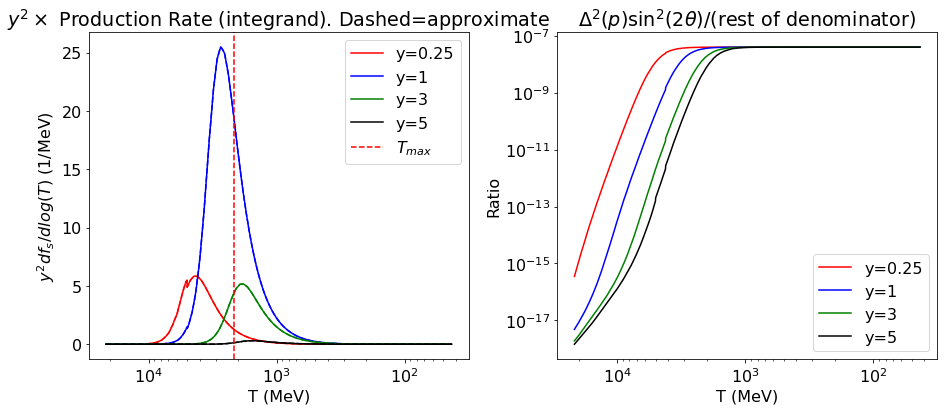

In [ ]:
ydomain = [0.25, 1, 3, 5] #p/Tfinal
colors = ['r', 'b', 'g', 'k']

def p_over_T(y, T_domain):
    return np.array([y*(sm.compute_SM_relativistic_dof_approx(T)/sm.compute_SM_relativistic_dof_approx(Tfinal))**(1./3) for T in T_domain])

fig, axs = plt.subplots(1, 2, figsize=(13, 6))

# Production rate
axs[0].set_title(r"$y^2 \times$ Production Rate (integrand). Dashed=approximate")
for y, color in zip(ydomain, colors):
    integrand = -1*sid.boltzmann_integrand_T(np.log(T_domain), y, Tfinal, theta, ms, flavor, antineutrino, simplify=False)
    axs[0].semilogx(T_domain, y**2*integrand, color=color, label=f'y={y}', )
    integrand_approx = -1*sid.boltzmann_integrand_T(np.log(T_domain), y, Tfinal, theta, ms, flavor, antineutrino, simplify='no theta in denom')
    axs[0].semilogx(T_domain, y**2*integrand_approx, color=color, ls='--')
axs[0].axvline(sid.Tmax(ms), ls='--', label=r'$T_{max}$', c='r')
axs[0].set_xlabel(r'T (MeV)')
axs[0].set_ylabel(r"$y^2 df_s/dlog(T)$ (1/MeV)")
# flip the x axis
axs[0].invert_xaxis()
axs[0].legend()

# Active neutrino scattering rate
axs[1].set_title(r"$\Delta^2(p) \sin^2(2\theta)$/(rest of denominator)")
for y, color in zip(ydomain, colors):
    p_domain = p_over_T(y, T_domain)*T_domain
    delta = ms**2/(2*p_domain)
    damping = sid.active_scattering_rate(p_domain, T_domain, flavor, simplify=False)/2
    V = sid.matter_potential(p_domain, T_domain, flavor, antineutrino, simplify=False)
    difference = (delta*np.sin(2*theta))**2/(damping**2 + (delta*np.cos(2*theta) - V)**2)
    axs[1].loglog(T_domain, ratio, label=f'y={y}', color=color)
axs[1].set_ylabel(r"Ratio")
axs[1].set_xlabel(r'T (MeV)')
axs[1].invert_xaxis()
axs[1].legend()

# Show all plots
plt.tight_layout()
plt.show()

In [ ]:
sinsq2theta_domain = np.logspace(-6, -14, 5)
ms_domain = np.logspace(-2, 3, 4)
flavor = 'electron'
difference_values = []

for ms in ms_domain:
    difference_row = []
    for sinsq2theta in sinsq2theta_domain:
        theta = np.arcsin(np.sqrt(sinsq2theta/2))
        full = sid.compute_omegahsq_sid(ms, theta, flavor, antineutrino=False, simplify=False)
        approx = sid.compute_omegahsq_sid(ms, theta, flavor, antineutrino=False, simplify='no theta in denom')
        difference = approx / full - 1
        difference_row.append(difference)
    difference_values.append(difference_row)

log_difference_array = np.log10(np.array(difference_values))

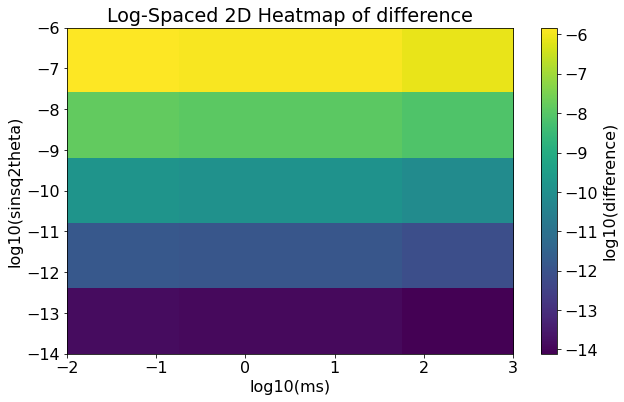

In [ ]:
log_ms_domain = np.log10(ms_domain)
log_sinsq2theta_domain = np.log10(sinsq2theta_domain)

# Create a 2D heatmap
plt.figure(figsize=(10, 6))
plt.imshow(np.transpose(log_difference_array), cmap='viridis', aspect='auto', extent=[np.min(log_ms_domain), np.max(log_ms_domain), np.min(log_sinsq2theta_domain), np.max(log_sinsq2theta_domain)])
plt.colorbar(label='log10(difference)')
plt.ylabel('log10(sinsq2theta)')
plt.xlabel('log10(ms)')
plt.title('Log-Spaced 2D Heatmap of difference')
#plt.grid()
plt.show()

# Self Interactions

## Check when the sterile neutrino scattering rate or potential matters

In [7]:
# Parameters
theta = 0.5*np.sqrt(10**-12)
ms = 10**0
flavor = 'electron'
antineutrino=False
simplify=False
Ti = min(10*sid.Tmax(ms), 150*10**3)
Tf_integral = max(1, 0.001*sid.Tmax(ms))
Tf = 10**0
T_domain = np.logspace(np.log10(Ti), np.log10(Tf_integral), 500)

# Computation
y_domain = np.linspace(0.25, 5, 50)

fs_boltzmann = []
for y in y_domain:
    rate = sid.boltzmann_integrand_T(np.log(T_domain), y, Tf, theta, ms, flavor, antineutrino, simplify)
    result = [integrate.simpson(rate[:i+1], np.log(T_domain[:i+1])) for i in range(len(rate)-1)]
    # prepend zero
    result.insert(0, 0)
    fs_boltzmann.append(np.array(result))

# First index is y, second index is T
poverT_domain = np.transpose([y_domain*Tf*(sid.SM_entropy_density(T_domain[i])/sid.SM_entropy_density(Tf))**(1./3) for i in range(len(T_domain))])/T_domain 
fs_boltzmann = np.array(fs_boltzmann)

# Compute beta
beta_domain = [integrate.simpson(poverT_domain[:,i]**2*fs_boltzmann[:,i], x=poverT_domain[:,i])/(1.5*special.zeta(3)) for i in range(len(T_domain))]

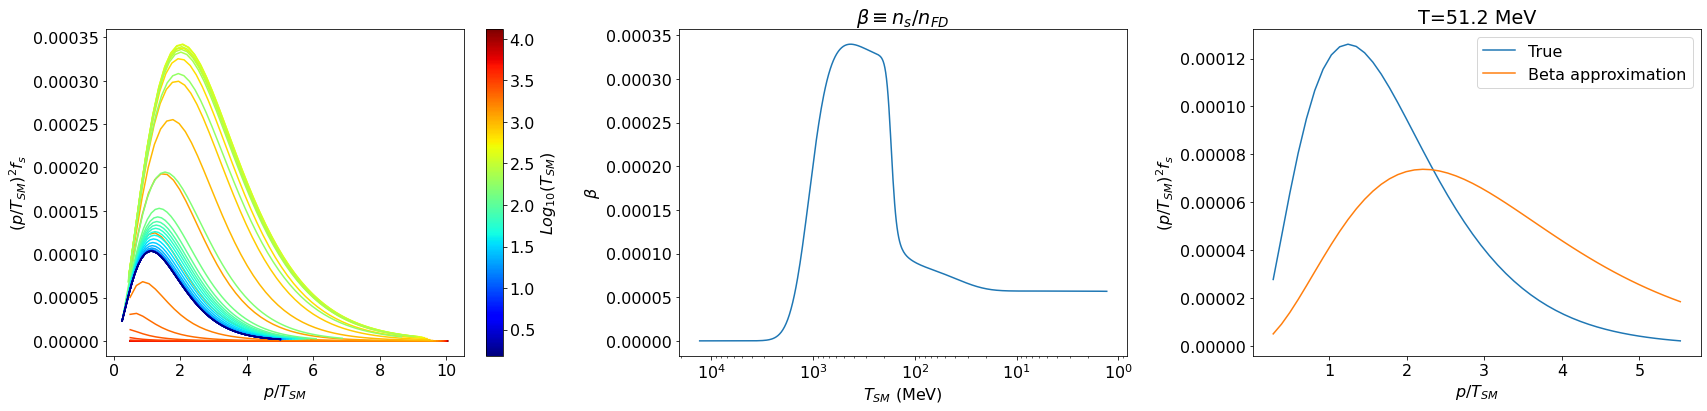

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(24,6)) # Adjust figsize as necessary

# Plot for fs_boltzmann
indices = np.arange(len(T_domain))[::10]
colors = cm.jet(np.linspace(1, 0, len(indices)))

for idx, color in zip(indices, colors):
    ax[0].plot(poverT_domain[:, idx], 2*poverT_domain[:, idx]**2*fs_boltzmann[:, idx], color=color)
ax[0].set_xlabel(r'$p/T_{SM}$')
ax[0].set_ylabel(r'$(p/T_{SM})^2 f_s$')

norm = plt.Normalize(np.log10(T_domain[indices[0]]), np.log10(T_domain[indices[-1]]))
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax[0], label=r'$Log_{10}(T_{SM})$')

# Plot for beta
ax[1].semilogx(T_domain, beta_domain)
ax[1].set_title(r'$\beta \equiv n_{s}/n_{FD}}$')
ax[1].set_ylabel(r'$\beta$')
ax[1].set_xlabel(r'$T_{SM}$ (MeV)')
ax[1].invert_xaxis()

# Plot for single fs at a moment in time
T_idx = 300
ax[2].set_title(f'T={T_domain[T_idx]:.3g} MeV')
ax[2].plot(poverT_domain[:, T_idx], 2*poverT_domain[:, T_idx]**2*fs_boltzmann[:, T_idx], label='True')
ax[2].plot(poverT_domain[:, T_idx], beta_domain[T_idx]*2*poverT_domain[:, T_idx]**2/(np.exp(poverT_domain[:, T_idx])+1), label=f'Beta approximation')
ax[2].legend()
ax[2].set_xlabel(r'$p/T_{SM}$')
ax[2].set_ylabel(r'$(p/T_{SM})^2 f_s$')

plt.tight_layout()
plt.show()

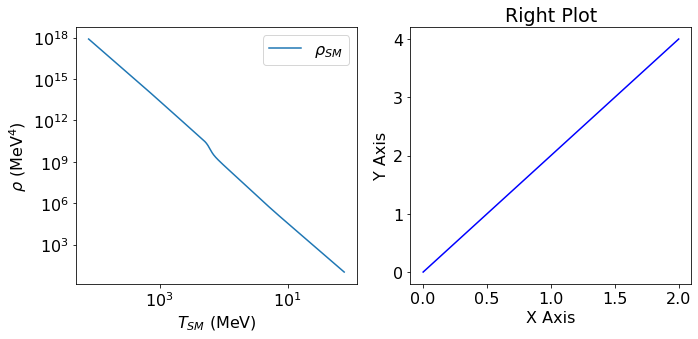

In [14]:
# Create a figure and a 1x2 subplot grid
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot data on the first subplot
ax[0].loglog(T_domain, ds.energy_density_func(T_domain), label=r'$\rho_{SM}$')
ax[0].invert_xaxis()
ax[1].set_title('DW Production')
ax[0].set_xlabel(r'$T_{SM}$ (MeV)')
ax[0].set_ylabel(r'$\rho$ (MeV$^4$)')
ax[0].legend()

# Plot data on the second subplot
ax[1].plot([0, 1, 2], [0, 2, 4], 'b-')
ax[1].set_title('Right Plot')
ax[1].set_xlabel('X Axis')
ax[1].set_ylabel('Y Axis')

# Adjust the space between the subplots
plt.tight_layout()

# Display the figure
plt.show()


## When does 2 to 2 sterile scattering enhance the production rate?

In [54]:
def find_min_coupling(ms, theta, g_phi=0.5, flavor='electron', Tf=1, y_domain = np.linspace(0.25, 5, 50)):
    """The theta value doesn't really matter"""
    # Parameters
    Ti = min(10*sid.Tmax(ms), 150*10**3)
    Tf_integral = max(1, 0.01*sid.Tmax(ms))
    T_domain = np.logspace(np.log10(Ti), np.log10(Tf_integral), 500)

    # Computation
    fs_boltzmann = []
    for y in y_domain:
        rate = sid.boltzmann_integrand_T(np.log(T_domain), y, Tf, theta, ms, flavor, antineutrino, simplify)
        result = [integrate.simpson(rate[:i+1], np.log(T_domain[:i+1])) for i in range(len(rate)-1)]
        result.insert(0, 0) # prepend zero
        fs_boltzmann.append(np.array(result))
    fs_boltzmann = np.array(fs_boltzmann)  # First index is y, second index is T

    # Find the maximum temperature and associated beta value
    poverT_domain = np.transpose([y_domain*Tf*(sid.SM_entropy_density(T_domain[i])/sid.SM_entropy_density(Tf))**(1./3)for i in range(len(T_domain))])/T_domain
    a = poverT_domain**2*fs_boltzmann
    y_idx, T_idx = np.unravel_index(a.argmax(), a.shape)
    T_value = T_domain[T_idx]
    T_value = T_value
    print(T_value)
    p_value = poverT_domain[y_idx, T_idx]*T_value
    print(p_value/T_value)
    beta = fs_boltzmann[y_idx, T_idx]/sid.fermi_dirac(p_value, T_value)
    print(beta)

    # Find G_phi/G_f above which the sterile scattering rate is larger than the active neutrino scattering rate
    p_avg = 3*T_value #approximate peak of the distribution
    c_a = sid.active_scattering_rate(p_avg, T_value, flavor, simplify=False)/(c.Gf**2*p_avg*T_value**4)
    gphi_over_gf_2to2 = np.sqrt(c_a/(0.03*beta))
    print(gphi_over_gf_2to2)

    # Find G_phi/G_f at which resonance hits
    gphi_over_gf_matter_potential = np.sqrt(16*np.sqrt(2)*g_phi*(c.m_W**-2+c.m_Z**-2)/(c.Gf*beta))
    print(gphi_over_gf_matter_potential)

    # Find the minimum coupling at which 2 to 4 scattering matters
    gphi_over_gf_2to4 = (np.sqrt(8*np.pi*sm.compute_SM_relativistic_dof_approx(T_value)/3)/(0.03*beta*p_avg*T_value**6*c.mplanck*c.Gf**4))**(1./4)
    print(gphi_over_gf_2to4)

    return T_value, beta, p_value/T_value, gphi_over_gf_2to2, gphi_over_gf_matter_potential, gphi_over_gf_2to4

In [56]:
theta = 0.5*np.sqrt(10**-15)
find_min_coupling(1, theta)

875.0390936318448
2.074151009544252
3.565774270029179e-07
27103.66322161878
27852.603436825877
309.99282632627654


(875.0390936318448,
 3.565774270029179e-07,
 2.074151009544252,
 27103.66322161878,
 27852.603436825877,
 309.99282632627654)

## Temp